## 手写线性回归

In [1]:
import random
import torch
from d2l import torch as d2l

### 生成数据集

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.4249,  0.7552]) 
label: tensor([0.7655])


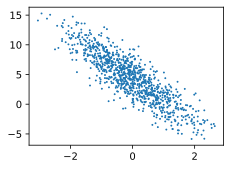

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

### 读取数据集

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
#         batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
# 这里indices不转成tensor似乎也可以
        batch_indices = indices[i : min(i + batch_size, num_examples)]
        # yield就是 return 返回一个值，并且记住这个返回的位置，下次迭代就从这个位置后(下一行)开始。
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1227, -0.4378],
        [-0.8167,  0.9654],
        [-0.0408,  1.1147],
        [-0.5066, -0.6983],
        [ 0.0080, -1.0302],
        [ 0.3464, -1.8319],
        [-1.2792,  0.0296],
        [-0.4929, -0.5910],
        [ 0.1928, -0.7821],
        [ 0.8233,  1.9495]]) 
 tensor([[ 5.4481],
        [-0.7206],
        [ 0.3214],
        [ 5.5508],
        [ 7.7272],
        [11.1341],
        [ 1.5498],
        [ 5.2344],
        [ 7.2507],
        [-0.7827]])


### 初始化模型参数

In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型

In [7]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### 定义损失函数

In [8]:
def squared_loss(y_hat, y):
    # 均方误差
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

In [9]:
def sgd(params, lr, batch_size):
    #小批量随机梯度下降
    with torch.no_grad(): #不创建计算图
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X , y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        #l的形状是(batch_size,1),而不是一个标量
        l.sum().backward()
         # 使用参数的梯度更新参数
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.025647
epoch 2, loss 0.000082
epoch 3, loss 0.000048


In [11]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0009, 0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0011], grad_fn=<RsubBackward1>)
